c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\USER\AppData\Local\Temp\ipykernel_21232\2347053232.py:14: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif(torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:


Usinf device cpu


100%|██████████| 50/50 [56:35<00:00, 67.90s/it] 


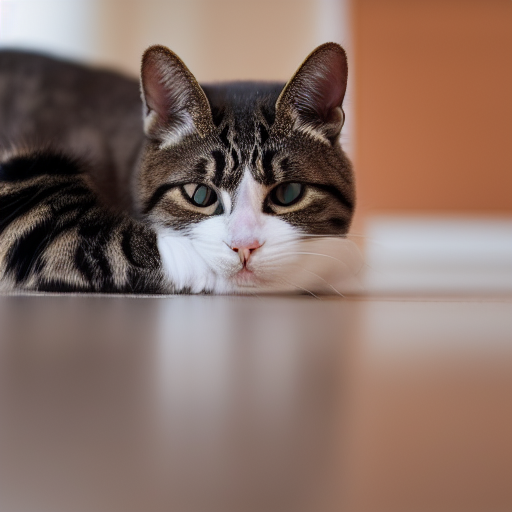

In [1]:
import model_loader
import pipeline
from PIL import Image
DEVICE = 'cpu'
import torch
from pathlib import Path
from transformers import CLIPTokenizer

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = 'cuda'
elif(torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = 'mps'    
print(f'Usinf device {DEVICE}')


tokenizer = CLIPTokenizer('../data/vocab.json', merges_file = '../data/merges.txt')
model_file = '../data/v1-5-pruned-emaonly.ckpt'
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

prompt = "A cat stretching on the floor, highly detailed, ultra sharp , cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""
do_cfg = True
cfg_scale = 8

## image to umage
input_image = None
image_path = '../images/dog.jpg'

strength = 0.9

sampler = 'ddpm'
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt = prompt,
    uncond_prompt = uncond_prompt,
    input_image = input_image,
    strength = strength,
    do_cfg = do_cfg,
    cfg_scale = cfg_scale,
    sampler_name = sampler,
    n_inference_steps  = num_inference_steps,
    seed = seed,
    models = models,
    device = DEVICE,
    idle_device = 'cpu',
    tokenizer = tokenizer,

)

Image.fromarray(output_image)